In [16]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50, InceptionV3, MobileNetV2, Xception
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess, decode_predictions as resnet_decode
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess, decode_predictions as inception_decode
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess, decode_predictions as mobilenet_decode
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess, decode_predictions as xception_decode

# Шлях до папки з вашими зображеннями
image_folder = 'l4img/'  # Можете змінити шлях до ваших зображень

# Отримання всіх зображень з папки
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Функція для підготовки зображення
def prepare_image(img_path, target_size, preprocess_function):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_function(img_array)

# Функція для відображення зображень та результатів
def display_predictions(image_path, predictions, model_name):
    img = image.load_img(image_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'{model_name} Predictions')
    plt.show()
    for pred in predictions:
        print(f"{pred[1]}: {pred[2]*100:.2f}%")
    print('-----------------------------------')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


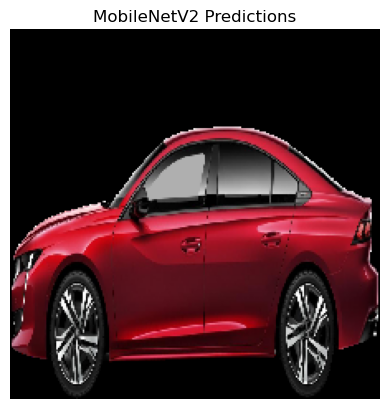

sports_car: 91.58%
car_wheel: 2.35%
convertible: 1.82%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


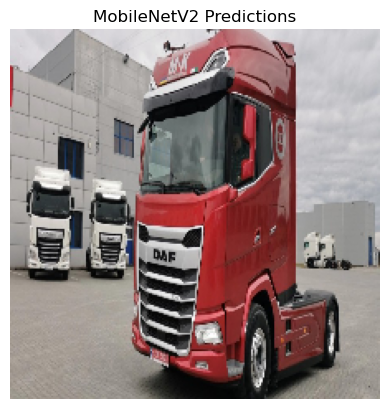

trailer_truck: 65.08%
fire_engine: 4.65%
tow_truck: 2.79%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


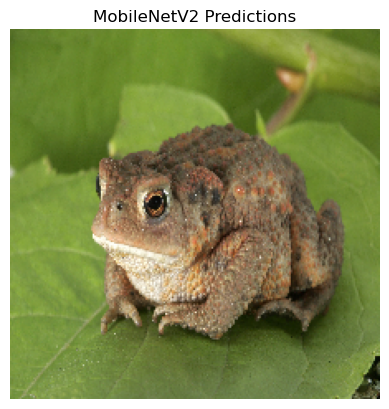

tailed_frog: 88.43%
tree_frog: 6.93%
eft: 0.30%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


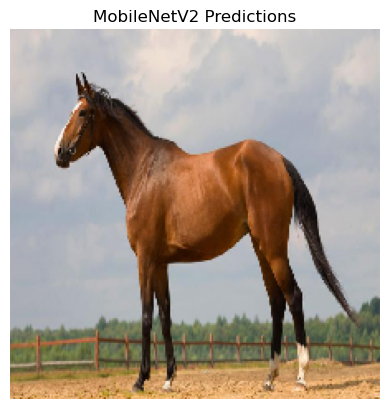

sorrel: 77.68%
hartebeest: 3.15%
Arabian_camel: 0.60%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


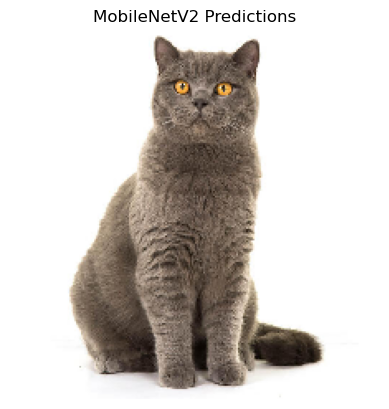

Egyptian_cat: 29.87%
tabby: 21.21%
tiger_cat: 12.80%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


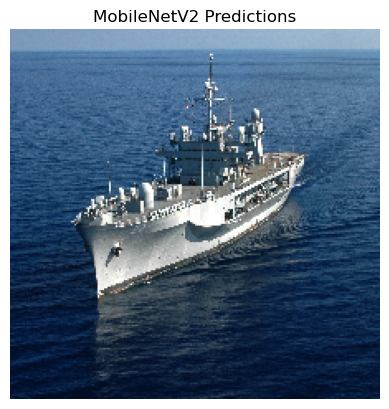

aircraft_carrier: 78.04%
liner: 4.10%
dock: 1.23%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


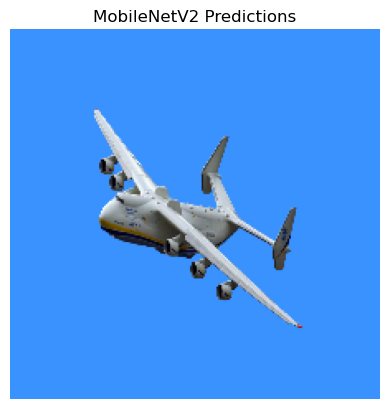

airliner: 39.76%
warplane: 37.93%
wing: 4.46%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


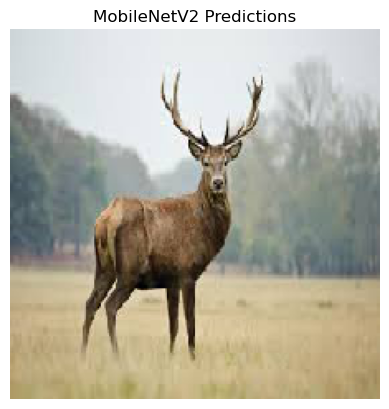

hartebeest: 65.35%
gazelle: 8.24%
ibex: 4.38%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


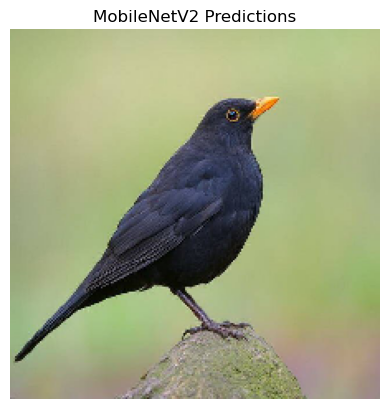

water_ouzel: 15.40%
coucal: 6.34%
magpie: 5.80%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


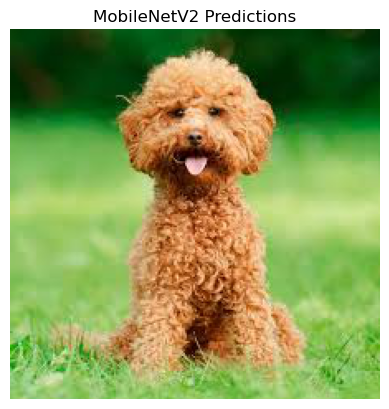

toy_poodle: 45.75%
miniature_poodle: 14.60%
standard_poodle: 10.16%
-----------------------------------


In [18]:
# Завантаження моделі MobileNetV2
model_mobilenet = MobileNetV2(weights='imagenet')

# Розпізнаємо зображення за допомогою MobileNetV2
for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)
    prepared_img = prepare_image(img_path, target_size=(224, 224), preprocess_function=mobilenet_preprocess)
    
    # Передбачення
    predictions = model_mobilenet.predict(prepared_img)
    
    # Декодуємо передбачення
    decoded_predictions = mobilenet_decode(predictions, top=3)[0]
    
    # Відображаємо зображення та результат
    display_predictions(img_path, decoded_predictions, "MobileNetV2")